# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import numpy as np
import pandas as pd
# other than these two you should not import any other packages


## A. Compute performance metrics for the given data '5_a.csv'
 <pre>  <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
# write your code here for task A

In [2]:
data=pd.read_csv("5_a.csv")
data.shape
data.head

<bound method NDFrame.head of          y     proba
0      1.0  0.637387
1      1.0  0.635165
2      1.0  0.766586
3      1.0  0.724564
4      1.0  0.889199
...    ...       ...
10095  1.0  0.665371
10096  1.0  0.607961
10097  1.0  0.777724
10098  1.0  0.846036
10099  1.0  0.679507

[10100 rows x 2 columns]>

In [3]:
def predict(df,y,thresh_hold):
    y_pred=[]
    for label in df[y]:
        if label<thresh_hold:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

def cal_vals(df,y,y_pred):
    tp=0
    tn=0
    fn=0
    fp=0
    for val1,val2 in enumerate(df['y']):
        if(df.y_pred[val1]==1) and df.y[val1]==1:
            tp=tp+1
        if(df.y_pred[val1]==0) and df.y[val1]==0:
            tn=tn+1
        if(df.y_pred[val1]==0) and df.y[val1]==1:
            fn=fn+1
        if(df.y_pred[val1]==1) and df.y[val1]==0:
            fp=fp+1
    return {'tn':tn,'tp':tp,'fn':fn,'fp':fp}

In [5]:
thresh_hold=0.5
data['y_pred']=predict(data,'proba',thresh_hold)
confusion_matrix=cal_vals(data,'y','y_pred')

In [6]:
# confusion matrix 
print("the confusion matrix is: ",confusion_matrix)

the confusion matrix is:  {'tn': 0, 'tp': 10000, 'fn': 0, 'fp': 100}


In [7]:
# F1 score
x=data.y.value_counts()
P=x[1]

precision=confusion_matrix['tp']/(confusion_matrix['tp']+confusion_matrix['fp'])
recall=confusion_matrix['tp']/P

F1=2*precision*recall/(precision+recall)
print('the F1 score is: ',F1)

the F1 score is:  0.9950248756218906


In [8]:
# Accuracy
Acc=(confusion_matrix['tp']+confusion_matrix['tn'])/data.shape[0]
print('the accuracy is: ',Acc)

the accuracy is:  0.9900990099009901


In [9]:
# AUC score
from tqdm import tqdm_notebook      
def auc(df):
    s = df['y'].value_counts()
    P = s[1]
    N = s[0]
    tpr = []
    fpr = []
    for elem in tqdm_notebook(df['proba']):
        df['y_pred']=predict(df,'proba',elem)
        confusion_matrix=cal_vals(df,'y','y_pred')
        tpr.append(confusion_matrix['tp']/P)
        fpr.append(confusion_matrix['fp']/N)
        df.drop(columns=['y_pred'])
    return np.trapz(tpr,fpr)

In [10]:
data=data.sort_values(by='proba',ascending=False)
data.drop(columns=['y_pred'])

,y,proba
1664,1.0,0.899965
2099,1.0,0.899828
1028,1.0,0.899825
9592,1.0,0.899812
8324,1.0,0.899768
...,...,...
8294,1.0,0.500081
1630,1.0,0.500058
7421,1.0,0.500058
805,1.0,0.500047


In [ ]:
AUC_score=auc(data)
print ('the AUC Score is :',AUC_score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/10100 [00:00<?, ?it/s]

the AUC Score is : 0.48829900000000004


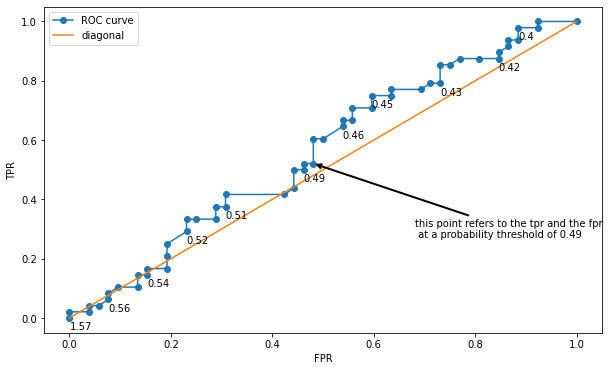

In [17]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

x = np.random.randint(40, 400, 100).reshape(-1, 1)
y = np.random.randint(0, 2, 100)

model = LogisticRegression()
model.fit(x, y)
probs = model.predict_proba(x)
fpr, tpr, thresholds = metrics.roc_curve(y, probs[:,1])

# %%
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::5], tpr[::5], thresholds[::5]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
    rnd_idx = 27
plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)),
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(facecolor='black', lw=2, arrowstyle='->'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()



## B. Compute performance metrics for the given data '5_b.csv'
<pre>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a>
Note- Make sure that you arrange your probability scores in descending order while calculating AUC</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [ ]:
# write your code here for task B

In [18]:
data_B=pd.read_csv('5_b.csv')
data_B.shape
data_B.head

<bound method NDFrame.head of          y     proba
0      0.0  0.281035
1      0.0  0.465152
2      0.0  0.352793
3      0.0  0.157818
4      0.0  0.276648
...    ...       ...
10095  0.0  0.474401
10096  0.0  0.128403
10097  0.0  0.499331
10098  0.0  0.157616
10099  0.0  0.296618

[10100 rows x 2 columns]>

In [19]:
thresh_hold=0.5
data_B['y_pred']=predict(data_B,'proba',thresh_hold)
confusion_matrix_B=cal_vals(data_B,'y','y_pred')

In [20]:
# confusion matrix
print('the confusion matrix is :', confusion_matrix_B)

the confusion matrix is : {'tn': 9761, 'tp': 55, 'fn': 45, 'fp': 239}


In [21]:
# F1 score
x=data_B.y.value_counts()
P=x[1]

precision_B=confusion_matrix_B['tp']/(confusion_matrix_B['tp']+confusion_matrix_B['fp'])
recall_B=confusion_matrix_B['tp']/P

F1_B=2*precision_B*recall_B/(precision_B+recall_B)
print('the F1 Score is : ',F1_B)

the F1 Score is :  0.2791878172588833


In [22]:
# Accuracy
Acc_B=(confusion_matrix_B['tp']+confusion_matrix_B['tn'])/data_B.shape[0]
print('the Accuracy is :',Acc_B)

the Accuracy is : 0.9718811881188119


In [ ]:
#AUC score
data_B=data_B.sort_values(by='proba',ascending=False)
data_B.drop(columns=['y_pred'])
AUC_score_B=auc(data_B)
print('the AUC Score is: ',AUC_score_B)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/10100 [00:00<?, ?it/s]

the AUC Score is:  0.9377570000000001


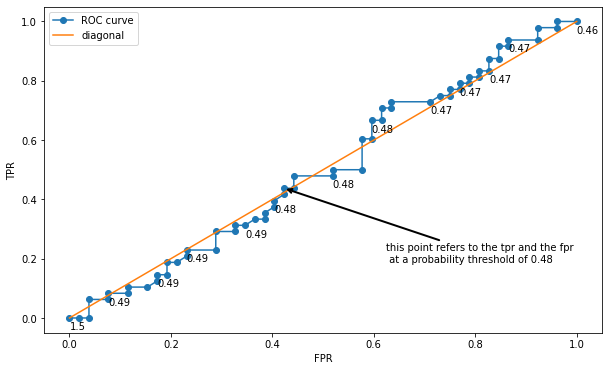

In [23]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

x = np.random.randint(40, 400, 100).reshape(-1, 1)
y = np.random.randint(0, 2, 100)

model = LogisticRegression()
model.fit(x, y)
probs = model.predict_proba(x)
fpr, tpr, thresholds = metrics.roc_curve(y, probs[:,1])

# %%
plt.subplots(figsize=(10, 6))
plt.plot(fpr, tpr, 'o-', label="ROC curve")
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
for x, y, txt in zip(fpr[::5], tpr[::5], thresholds[::5]):
    plt.annotate(np.round(txt,2), (x, y-0.04))
    rnd_idx = 27
plt.annotate('this point refers to the tpr and the fpr\n at a probability threshold of {}'.format(np.round(thresholds[rnd_idx], 2)),
             xy=(fpr[rnd_idx], tpr[rnd_idx]), xytext=(fpr[rnd_idx]+0.2, tpr[rnd_idx]-0.25),
             arrowprops=dict(facecolor='black', lw=2, arrowstyle='->'),)
plt.legend(loc="upper left")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

### C. Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data 
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [ ]:
 # write your code for task C

In [24]:
# lowest metric values

def min_metric(data):
    s = data['y'].value_counts()
    P = s[1]
    N = s[0]
    tpr = []
    fpr = []
    metric={}
    for elem in tqdm_notebook(data['prob']):
        data['y_pred']=predict(data,'prob',elem)
        confusion_matrix=cal_vals(data,'y','y_pred')
#         tpr.append(confusion_matrix['tp']/P)
#         fpr.append(confusion_matrix['fp']/N)
        metric_val=(500*confusion_matrix['fn'])+(100*confusion_matrix['fp'])
        metric[elem]=metric_val
        data.drop(columns=['y_pred'])
    return(metric)

In [25]:
data=pd.read_csv('5_c.csv')
print(data.head())
print(data.shape)
data=data.sort_values(by='prob',ascending=False)
result=min_metric(data)

   y      prob
0  0  0.458521
1  0  0.505037
2  0  0.418652
3  0  0.412057
4  0  0.375579
(2852, 2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # Remove the CWD from sys.path while we load stuff.


  0%|          | 0/2852 [00:00<?, ?it/s]

In [26]:
temp = min(result.values()) 
res = [key for key in result if result[key] == temp]
print('the key:value pair for min value of the specified metric is-',res,temp)

the key:value pair for min value of the specified metric is- [0.2300390278970873] 141000



## D.</b></font> Compute performance metrics(for regression) for the given data 5_d.csv
<pre>    <b>Note 2:</b> use pandas or numpy to read the data from <b>5_d.csv</b>
    <b>Note 1:</b> <b>5_d.csv</b> will having two columns Y and predicted_Y both are real valued features
<ol>
<li> Compute Mean Square Error </li>
<li> Compute MAPE: https://www.youtube.com/watch?v=ly6ztgIkUxk</li>
<li> Compute R^2 error: https://en.wikipedia.org/wiki/Coefficient_of_determination#Definitions </li>
</ol>
</pre>

In [ ]:
 # write your code for task 5d

In [27]:
data_d=pd.read_csv("5_d.csv")
data_d.shape
data_d.head()

,y,pred
0,101.0,100.0
1,120.0,100.0
2,131.0,113.0
3,164.0,125.0
4,154.0,152.0


In [28]:
def error(df,col1,col2):
    val=[]
    for index, (value1, value2) in enumerate(zip(df[col1], df[col2])):
        val.append(value1-value2)
    return val
    
def absolute_error(df,col):
    val=[]
    for index,value in enumerate(df[col]):
        val.append(abs(value))
    return val

def mean_sq_error(df,col):
    return ss_res(df,col)/len(df[col])

def mape(df,col1,col2):
    val=sum(df[col1])/sum(df[col2])
    return val

def ss_res(df,col):
    val=0
    for index,value in enumerate(df[col]):
        val=val+(value*value)
    return val

def ss_tot(df,col):
    val=0
    mean_val=data_d['y'].mean()
    for index,value in enumerate(df[col]):
        val=val+ (value-mean_val)*(value-mean_val)
    return val

In [29]:
data_d['error']=error(data_d,'y','pred')
data_d['abs_error']=absolute_error(data_d,'error')

In [30]:
MSE=mean_sq_error(data_d,'error')
print("the Mean squared error is : ", MSE)

the Mean squared error is :  177.16569974554707


In [31]:
MAPE=mape(data_d,'abs_error','y')
print('the MAPE value is :', MAPE)

the MAPE value is : 0.1291202994009687


In [32]:
SS_RES=ss_res(data_d,'error')
SS_TOT=ss_tot(data_d,'y')
R_square= 1- (SS_RES/SS_TOT)
print('the Co-efficient of determination value is: ',R_square)

the Co-efficient of determination value is:  0.9563582786990964
